<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_30536/148400109.py:16: SyntaxWarning: invalid escape sequence '\d'
  df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)
/tmp/ipykernel_30536/148400109.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby("Sales_Category")[selected_criteria].mean()


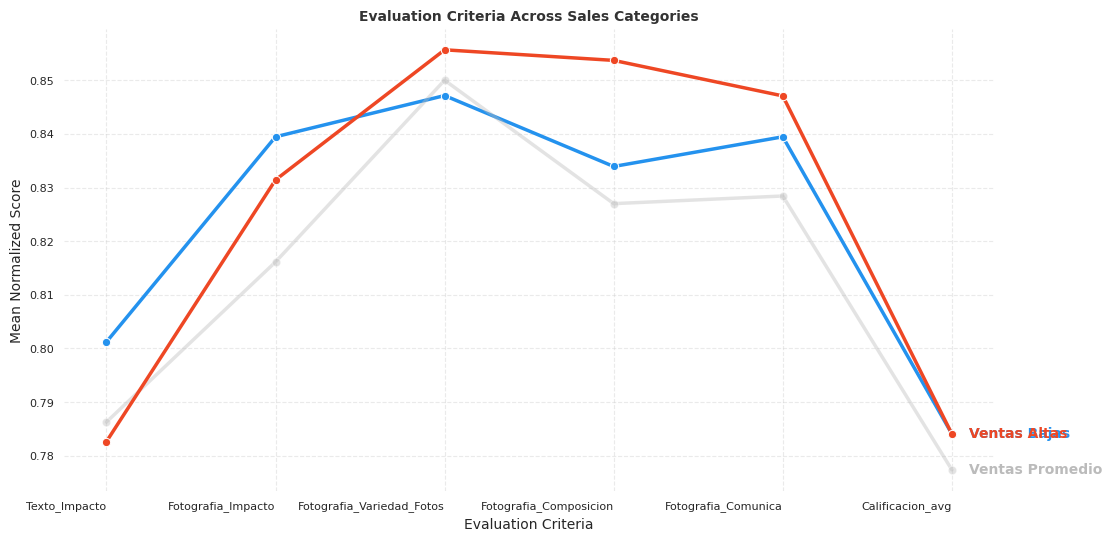

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib
import matplotlib.font_manager as font_manager

# Load the dataset
file_path = "/workspaces/DiariosModernos/prueba_criterios.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns, excluding PeriodicosID
df = df.drop(columns=["Fecha", "envio_total", "cobrable", "devuelto", "vendido"], errors="ignore")

# Convert "Ventas" column to numeric
df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)

# Define the selected criteria (columns you want to normalize)
selected_criteria = [
    "Texto_Impacto",
    "Fotografia_Impacto",
    "Fotografia_Variedad_Fotos",
    "Fotografia_Composicion",
    "Fotografia_Comunica",
    "Calificacion_avg"
]

# Keep only selected criteria + 'Ventas' for categorization (PeriodicosID is not involved in normalization)
df = df[["PeriodicosID", "Ventas"] + selected_criteria]

# Normalize selected criteria columns only
scaler = MinMaxScaler()
df[selected_criteria] = scaler.fit_transform(df[selected_criteria])

# Categorize sales into low, medium, high using quantiles
df["Sales_Category"] = pd.qcut(df["Ventas"], q=3, labels=["Ventas Bajas", "Ventas Promedio", "Ventas Altas"])

# Group by sales category and compute the mean for selected criteria
grouped_df = df.groupby("Sales_Category")[selected_criteria].mean()

# Transpose for better visualization
grouped_df_T = grouped_df.T

# Define colors for each sales category
colors = {
    "Ventas Bajas": "#2492ee",    # Blue
    "Ventas Promedio": "#bbbbbb",  # Yellow (with transparency)
    "Ventas Altas": "#ee4724"      # Green
}

hfont = {'fontname': 'Helvetica'}

# Set seaborn style without axes spines (no box around grid)
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.left': False, 'axes.spines.bottom': False})

# Create the figure
plt.figure(figsize=(12, 6))

# Plot each sales category as a separate line
for category in grouped_df_T.columns:
    alpha = 0.4 if category == "Ventas Promedio" else 1.0  # Transparency for middle category
    sns.lineplot(
        data=grouped_df_T,
        x=grouped_df_T.index,
        y=grouped_df_T[category],
        label=category,
        color=colors[category],
        alpha=alpha,
        marker="o",
        linewidth=2.5
    )

# Customize the plot
plt.title("Evaluation Criteria Across Sales Categories", fontsize=10, fontweight="bold", color="#333")
plt.xlabel("Evaluation Criteria", fontsize=10, fontweight="medium")
plt.ylabel("Mean Normalized Score", fontsize=10, fontweight="medium")

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha="right", fontsize=8)
plt.yticks(ha='right', fontsize=8)

# Remove the legend
plt.legend().remove()

# Add labels next to the lines on the right side of the plot with a small offset
for category in grouped_df_T.columns:
    plt.text(
        x=len(grouped_df_T.index) - 1 + 0.1,  # Small offset to the right
        y=grouped_df_T[category].iloc[-1], 
        s=category,
        color=colors[category],
        fontsize=10,
        fontweight="bold",
        va="center"
    )

# Improve grid visibility
plt.grid(True, linestyle="dashed", alpha=0.4)

# Show the plot
plt.show()

/tmp/ipykernel_30536/3473518376.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PeriodicosID', y='Calificacion_avg', data=df, palette="coolwarm")


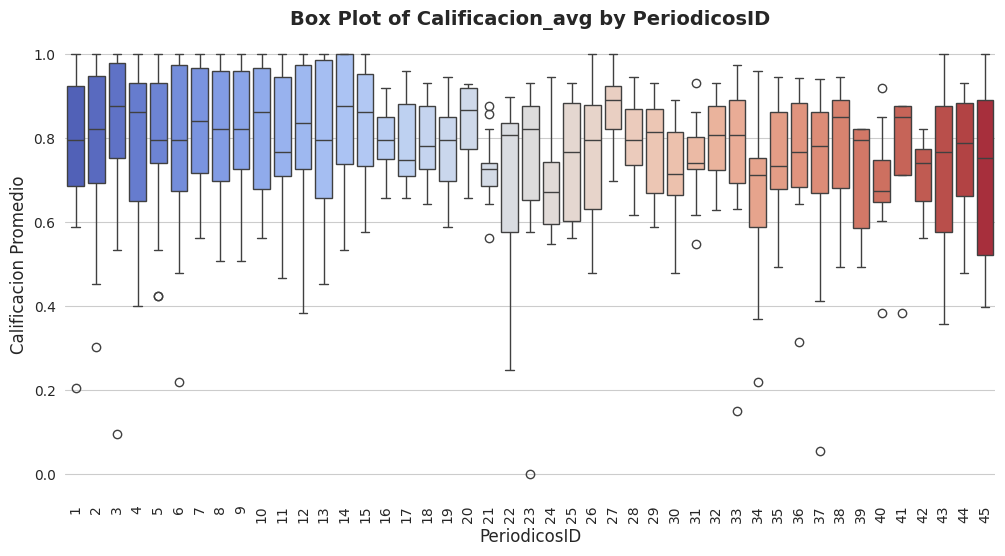

In [52]:
df['PeriodicosID'] = df['PeriodicosID'].astype('category')

# Create the boxplot
plt.figure(figsize=(12, 6))

# Manually set the x-axis labels (i.e., 'PeriodicosID' values) for better control
plt.xticks(ticks=range(len(df['PeriodicosID'].cat.categories)),
           labels=df['PeriodicosID'].cat.categories, rotation=90)

# Create the boxplot with PeriodicosID as the x-axis and Calificacion_avg as the y-axis
sns.boxplot(x='PeriodicosID', y='Calificacion_avg', data=df, palette="coolwarm")

# Set the title and labels
plt.title("Box Plot of Calificacion_avg by PeriodicosID", fontsize=14, fontweight="bold")
plt.xlabel("PeriodicosID", fontsize=12)
plt.ylabel("Calificacion Promedio", fontsize=12)

# Show the plot
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_30536/4023949420.py:9: SyntaxWarning: invalid escape sequence '\d'
  df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)
/tmp/ipykernel_30536/4023949420.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[selected_criteria] = scaler.fit_transform(df_selected[selected_criteria])


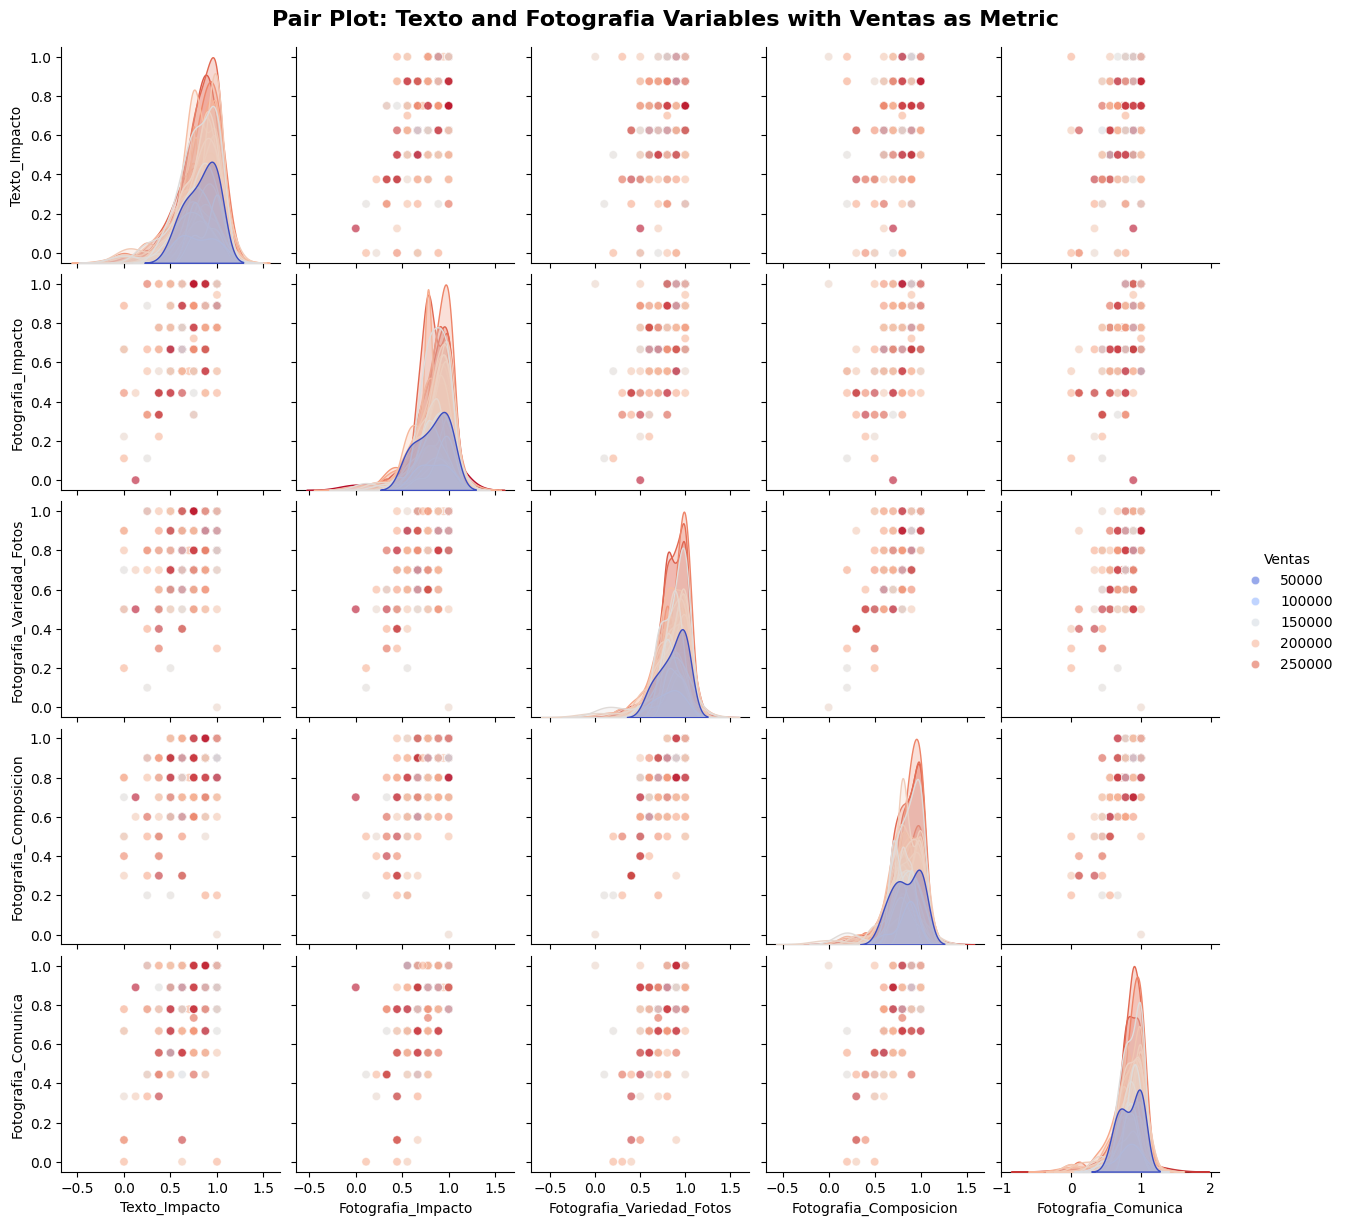

In [5]:
# Load the dataset
file_path = "/workspaces/DiariosModernos/prueba_criterios.csv"
df = pd.read_csv(file_path)

# Drop unnecessary columns
df = df.drop(columns=["PeriodicosID", "Fecha", "envio_total", "cobrable", "devuelto", "vendido"], errors="ignore")

# Convert "Ventas" column to numeric
df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)

# Define the selected criteria
selected_criteria = [
    "Texto_Impacto",
    "Fotografia_Impacto",
    "Fotografia_Variedad_Fotos",
    "Fotografia_Composicion",
    "Fotografia_Comunica"
]

# Ensure only relevant columns are used, including "Ventas"
df_selected = df[["Ventas"] + selected_criteria]

# Normalize selected criteria
scaler = MinMaxScaler()
df_selected[selected_criteria] = scaler.fit_transform(df_selected[selected_criteria])

# Create pair plot for the selected criteria
sns.pairplot(
    df_selected,
    vars=selected_criteria,  # Only use the specific selected criteria
    hue="Ventas",  # Hue by the "Ventas" column
    palette="coolwarm",  # Color palette for better distinction
    plot_kws={"alpha": 0.6},  # Adjust transparency of points for clarity
)

# Customize the plot
plt.suptitle("Pair Plot: Texto and Fotografia Variables with Ventas as Metric", fontsize=16, fontweight="bold")
plt.subplots_adjust(top=0.95)  # Adjust title position

# Show the plot
plt.show()


<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_30536/4212532550.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)
/tmp/ipykernel_30536/4212532550.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


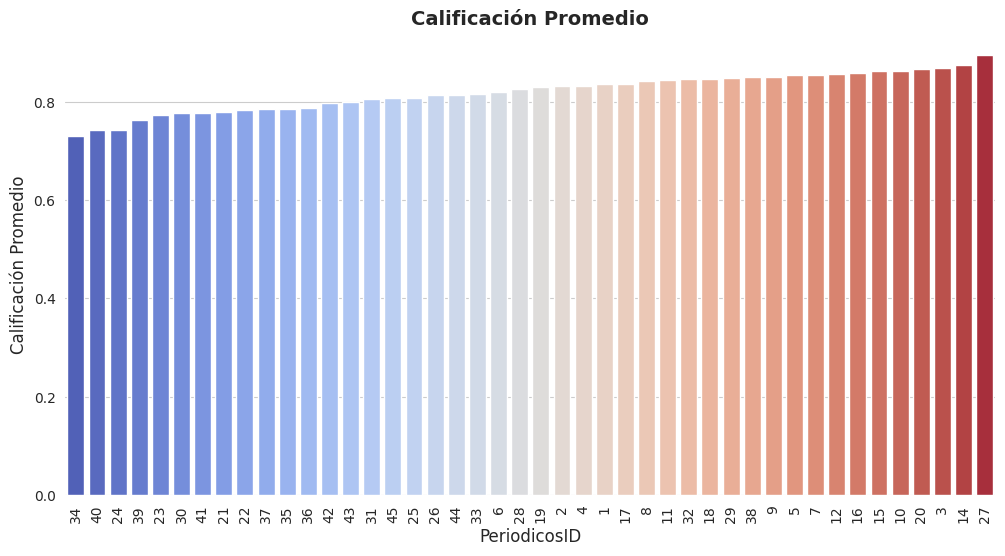

In [27]:
# Drop unnecessary columns, keeping 'PeriodicosID' and relevant ones
df = df.drop(columns=["Fecha", "envio_total", "cobrable", "devuelto", "vendido"], errors="ignore")

# Convert "Ventas" column to numeric
df["Ventas"] = df["Ventas"].replace("[^\d.]", "", regex=True).astype(float)

# Define the selected criteria
selected_criteria = [
    "Texto_Impacto",
    "Fotografia_Impacto",
    "Fotografia_Variedad_Fotos",
    "Fotografia_Composicion",
    "Fotografia_Comunica"
]

# Ensure only relevant columns are used, including "Ventas" and "PeriodicosID"
df_selected = df[["PeriodicosID", "Ventas"] + selected_criteria]

# Filter rows where 'Ventas' > 150,000
df_selected = df_selected[df_selected["Ventas"] > 150000]

# Normalize selected criteria
scaler = MinMaxScaler()
df_selected[selected_criteria] = scaler.fit_transform(df_selected[selected_criteria])

# Calculate the average rating (Calificacion_avg) across the selected criteria
df_selected["Calificacion_avg"] = df_selected[selected_criteria].mean(axis=1)

# Group by PeriodicosID and calculate the mean Calificacion_avg
df_grouped = df_selected.groupby("PeriodicosID")["Calificacion_avg"].mean().reset_index()

# Sort the dataframe by Calificacion_avg in descending order
df_grouped_sorted = df_grouped.sort_values("Calificacion_avg", ascending=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid", {'axes.spines.top': False, 'axes.spines.right': False, 'axes.spines.left': False, 'axes.spines.bottom': False})


# Ensure PeriodicosID is ordered correctly on x-axis
sns.barplot(
    data=df_grouped_sorted,
    x="PeriodicosID", 
    y="Calificacion_avg", 
    palette="coolwarm",
    order=df_grouped_sorted["PeriodicosID"]  # Set order explicitly based on sorted values
)

# Customize the plot
plt.title("Calificación Promedio", fontsize=14, fontweight="bold")
plt.xlabel("PeriodicosID", fontsize=12)
plt.ylabel("Calificación Promedio", fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [29]:
df.describe()

,Texto_Relevancia,Texto_Impacto,Texto_Rigor_Etica_Profesional,Texto_Coyuntura,Texto_Penetracion,Fotografia_Impacto,Fotografia_Variedad_Fotos,Fotografia_Composicion,Fotografia_Comunica,Fotografia_Puesta_En_Pagina_Fotos,PeriodicosID,Ventas,Calificacion_avg
count,656.000000,656.000000,656.00000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000
mean,8.364329,8.322561,8.33628,8.333079,8.310213,8.460366,8.507622,8.376524,8.542073,8.515854,18.041159,203056.458841,8.406890
std,1.525081,1.557992,1.48857,1.443317,1.407245,1.478843,1.513281,1.469277,1.467926,1.500450,13.004162,45237.841367,1.203282
min,0.000000,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,28656.000000,2.700000
25%,7.950000,7.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,180492.000000,7.700000
50%,9.000000,9.000000,8.00000,8.000000,8.000000,9.000000,9.000000,9.000000,9.000000,9.000000,14.000000,199932.000000,8.500000
75%,10.000000,10.000000,10.00000,9.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,30.000000,233568.000000,9.400000
max,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,11.000000,45.000000,285156.000000,10.000000
